* Data preparation:
  1. How to handle raw Data?
  2. Removing and filling null values.
  3. Data cleaning and removing Duplicates

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [54]:
#1.
data = pd.read_excel("data.xlsx")
print(data)
print(data.columns)

C:\Users\abhij\anaconda3\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


                      time Cyclone_Inlet_Gas_Temp Cyclone_Material_Temp  \
0      2017-01-01 00:00:00                 867.63                910.42   
1      2017-01-01 00:05:00                 879.23                918.14   
2      2017-01-01 00:10:00                 875.67                924.18   
3      2017-01-01 00:15:00                 875.28                923.15   
4      2017-01-01 00:20:00                 891.66                934.26   
...                    ...                    ...                   ...   
377714 2020-08-07 11:55:00                 899.42                919.79   
377715 2020-08-07 12:00:00                  879.9                895.02   
377716 2020-08-07 12:05:00                  887.2                 895.7   
377717 2020-08-07 12:10:00                  908.5                916.33   
377718 2020-08-07 12:15:00                 880.86                905.31   

       Cyclone_Outlet_Gas_draft Cyclone_cone_draft Cyclone_Gas_Outlet_Temp  \
0                    

In [103]:
#2.
print(data.isnull().sum())

data.fillna(method ="ffill", inplace =True)

value    0
dtype: int64


C:\Users\abhij\AppData\Local\Temp\ipykernel_4196\2438695328.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method ="ffill", inplace =True)


In [107]:
#3.
duplicates = data.duplicated()
print(f"Number of duplicates: {duplicates.sum()}")

data = data.drop_duplicates()
print(data)

Number of duplicates: 0
            value
time             
2024-01-01     10
2024-01-02     11
2024-01-03     12
2024-01-04     13
2024-01-05     14
...           ...
2024-12-26    370
2024-12-27    371
2024-12-28    372
2024-12-29    373
2024-12-30    374

[245 rows x 1 columns]


*Analysis strategy:
  1. Trend analysis: Look for patterns over time in temperatures and drafts.
  2. Correlation analysis: Analyze relationships between variables using correlation matrices.
  3. Time series insights: Resample the data to observe weekly, monthly, or seasonal patterns.
   

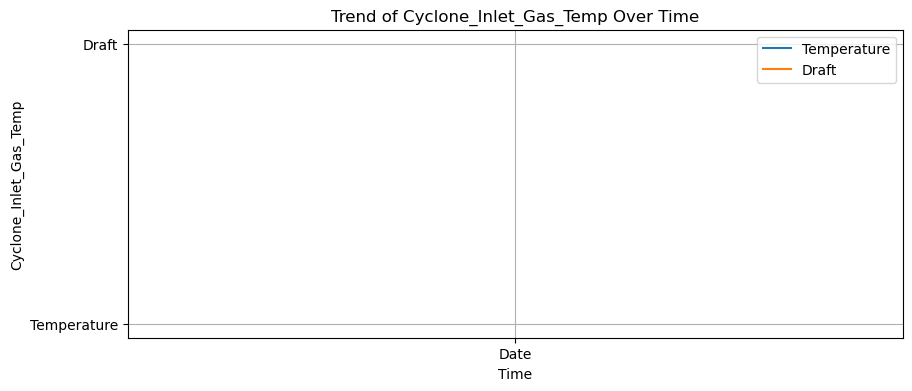

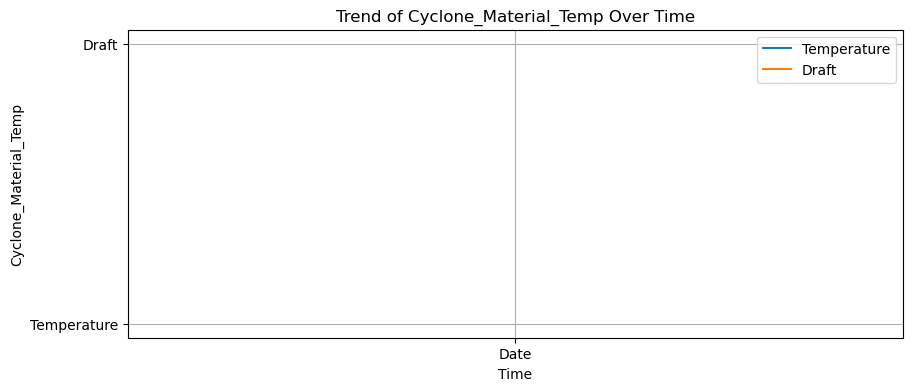

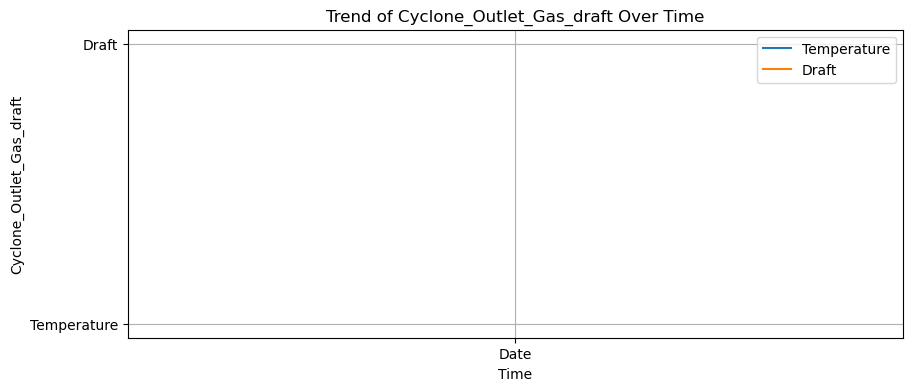

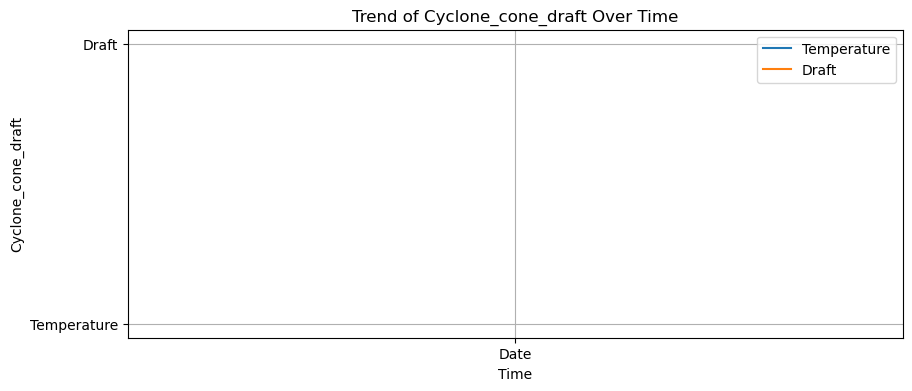

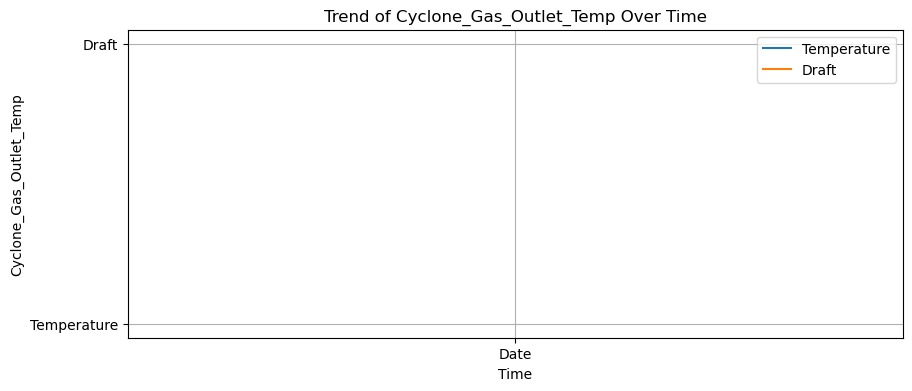

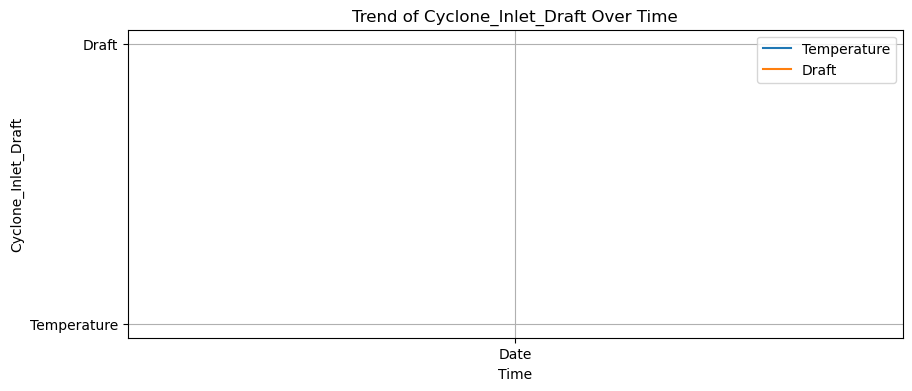

In [111]:
# Trend analysis:

variables = ["Cyclone_Inlet_Gas_Temp", "Cyclone_Material_Temp", "Cyclone_Outlet_Gas_draft",
             "Cyclone_cone_draft","Cyclone_Gas_Outlet_Temp", "Cyclone_Inlet_Draft"]
              
for var in variables:
    plt.figure(figsize =(10, 4))
    plt.plot(["Date"], ["Temperature"], label ="Temperature")
    plt.plot(["Date"], ["Draft"], label ="Draft")
    plt.title(f"Trend of {var} Over Time")
    plt.xlabel("Time")
    plt.ylabel(var)
    plt.legend()
    plt.grid(True)
    plt.show()


Correlation Matrix:
                 Temperature     Draft  Other_Variables
Temperature         1.000000  1.000000         0.939558
Draft               1.000000  1.000000         0.939558
Other_Variables     0.939558  0.939558         1.000000


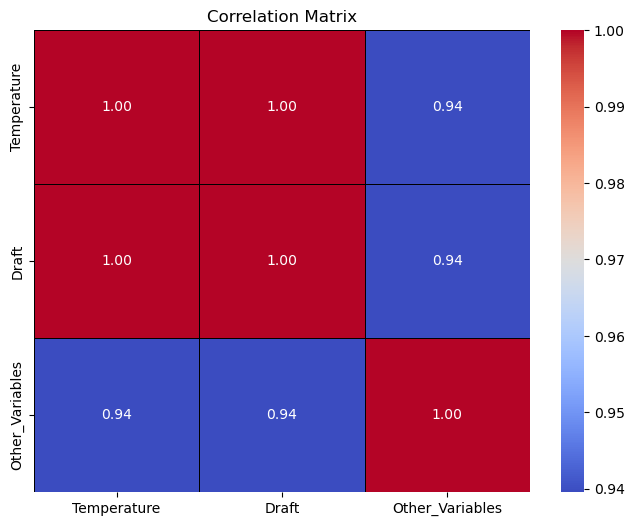

In [60]:
#Correlation analysis:

data = pd.DataFrame({"Temperature": [10,11,12,13,14],"Draft": [15,16,17,18,19],"Other_Variables": [100, 110, 115, 125, 155]})

correlation_matrix = data.corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot = True, cmap ="coolwarm", fmt =".2f", linewidths =0.5, linecolor ="black")
plt.title("Correlation Matrix")
plt.show()

resample the data inform of plot:


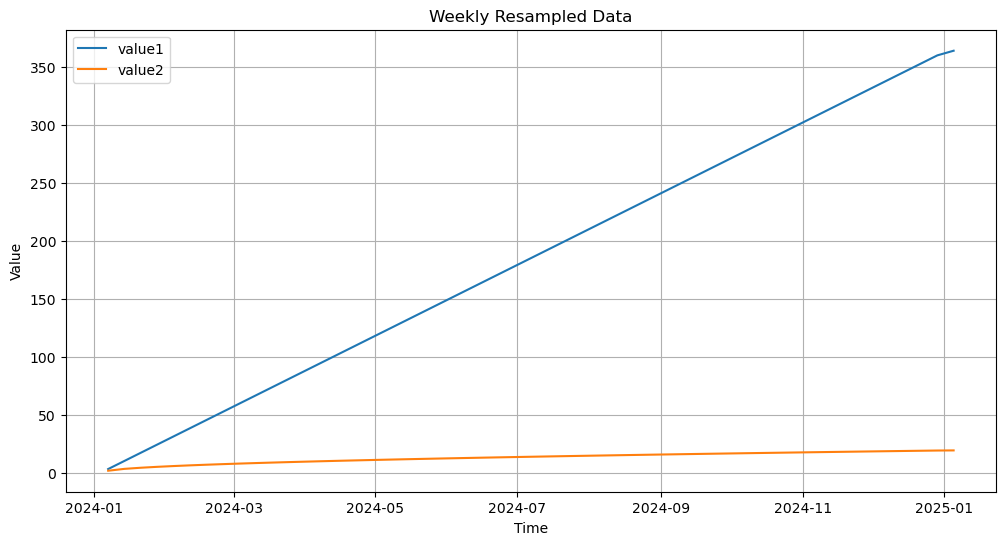

C:\Users\abhij\AppData\Local\Temp\ipykernel_4196\593253337.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_data = data.resample(freq).mean()


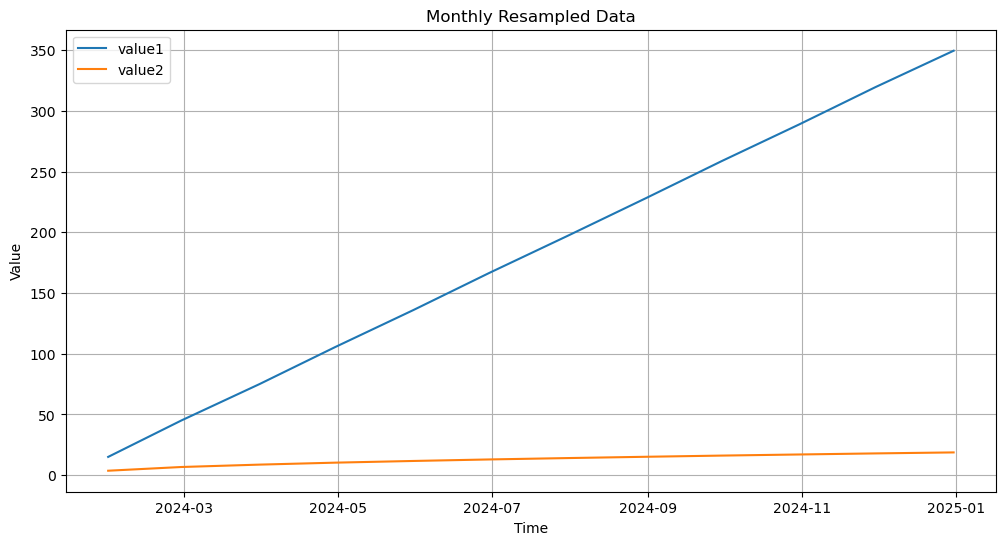

C:\Users\abhij\AppData\Local\Temp\ipykernel_4196\593253337.py:16: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  resampled_data = data.resample(freq).mean()


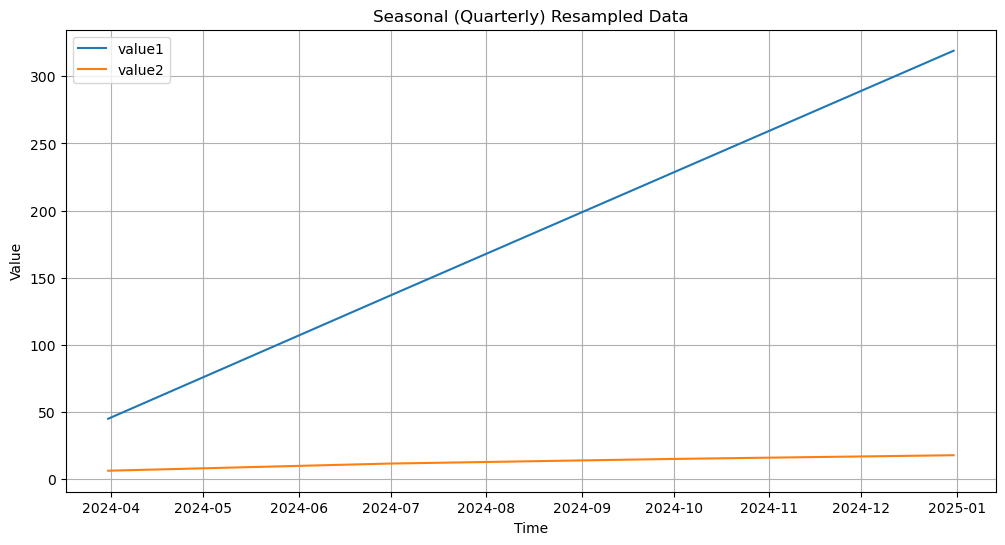

In [74]:
#Time series insights:

print("resample the data inform of plot:")

data = {"time": pd.date_range(start ="2024-01-01", periods =365, freq ="D"),
        "value1": range(365),
        "value2": [x**0.5 for x in range(365)]}
df = pd.DataFrame(data)

df["time"] = pd.to_datetime(df["time"])
df.set_index("time", inplace=True)

numeric_columns = df.select_dtypes(include ="number").columns

def resample_and_plot(data, freq, title):
    resampled_data = data.resample(freq).mean()
    plt.figure(figsize =(12, 6))
    for col in numeric_columns:
        plt.plot(resampled_data.index, resampled_data[col], label=col)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()
    return resampled_data

weekly_data = resample_and_plot(df, "W", "Weekly Resampled Data")

monthly_data = resample_and_plot(df, "M", "Monthly Resampled Data")

quarterly_data = resample_and_plot(df, "Q", "Seasonal (Quarterly) Resampled Data")


* Insights : 
   1. Derive key insights from seasonal trends.
   2. Detect and highlight abnormal periods in the dataset.
   3. Use statistical techniques like Z-scores to identify outliers.


C:\Users\abhij\AppData\Local\Temp\ipykernel_4196\4091135538.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample("M").mean()


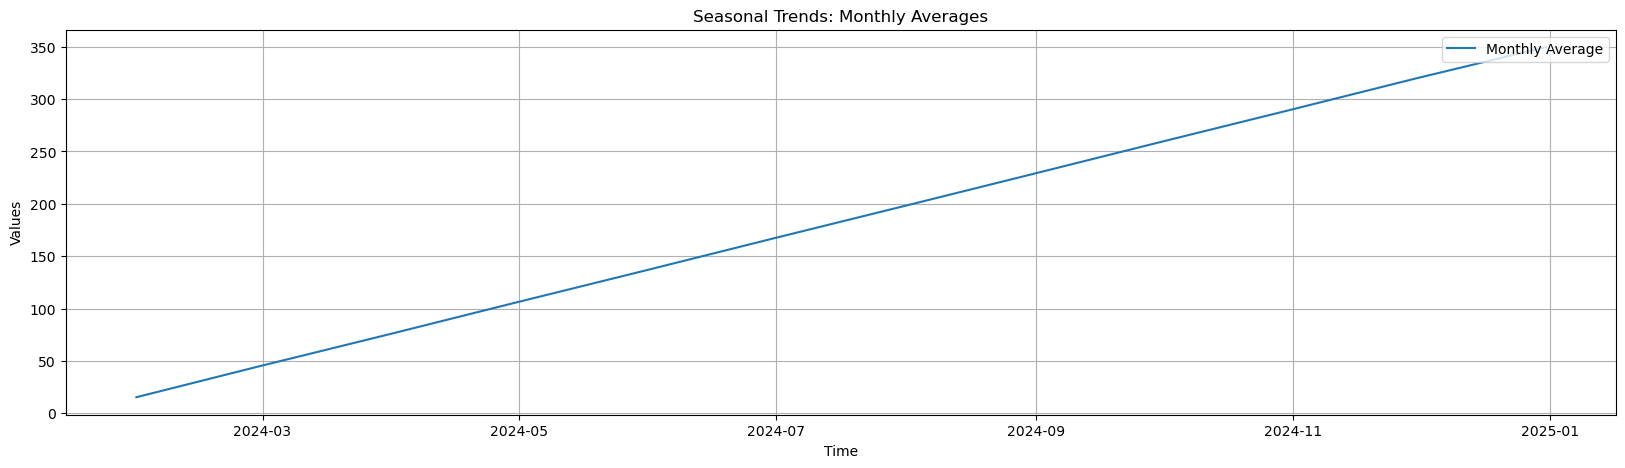

In [78]:
#1.

data = pd.DataFrame({"time": pd.date_range(start ="2024-01-01", periods=365, freq ="D"),
                     "value": [x + (10 * (1 if i % 30 < 15 else -1)) for i, x in enumerate(range(365))]})

data["time"] = pd.to_datetime(data["time"])
data.set_index("time", inplace=True)

monthly_data = data.resample("M").mean()

plt.figure(figsize = (20,5))
plt.plot(monthly_data.index, monthly_data["value"], label = "Monthly Average")
plt.title("Seasonal Trends: Monthly Averages")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend(loc = "upper right")
plt.grid(True)
plt.show()


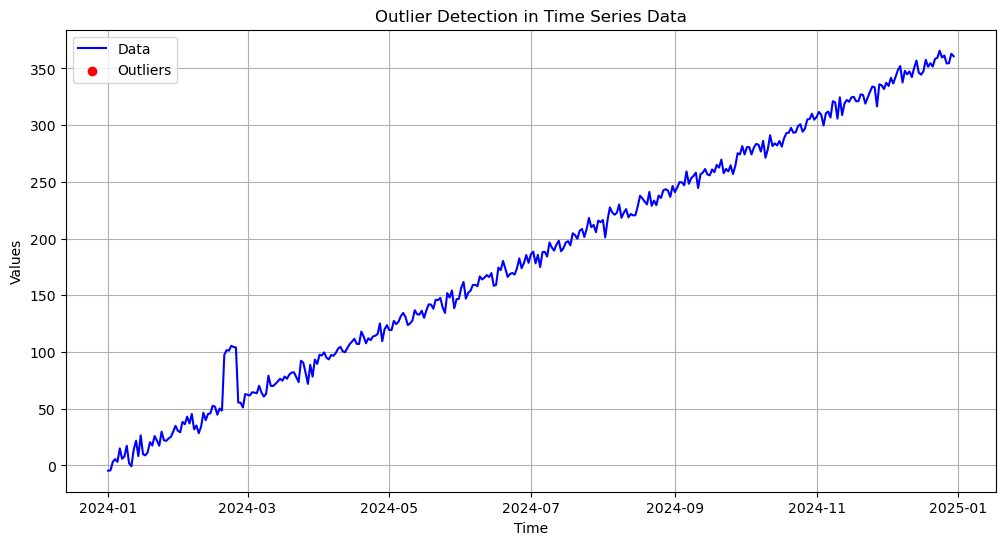

Detected Outliers:
Empty DataFrame
Columns: [value, z_score, is_outlier]
Index: []


In [66]:
#2.

data = pd.DataFrame({"time": pd.date_range(start ="2024-01-01", periods =365, freq ="D"),
                     "value": [x + (np.random.normal(scale=5)) for x in range(365)]})

data.loc[50:55, "value"] += 50 

data["time"] = pd.to_datetime(data["time"])
data.set_index("time", inplace=True)

data["z_score"] = (data["value"] - data["value"].mean()) / data["value"].std()
data["is_outlier"] = np.abs(data["z_score"]) > 2  

plt.figure(figsize =(12, 6))
plt.plot(data.index, data["value"], label ="Data", color ="blue")
plt.scatter( data.index[data["is_outlier"]],
             data["value"][data["is_outlier"]],
             color ="red",
             label ="Outliers",
             zorder =5)

plt.title("Outlier Detection in Time Series Data")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend(loc ="upper left")
plt.grid(True)
plt.show()

outliers = data[data["is_outlier"]]
print("Detected Outliers:")
print(outliers)


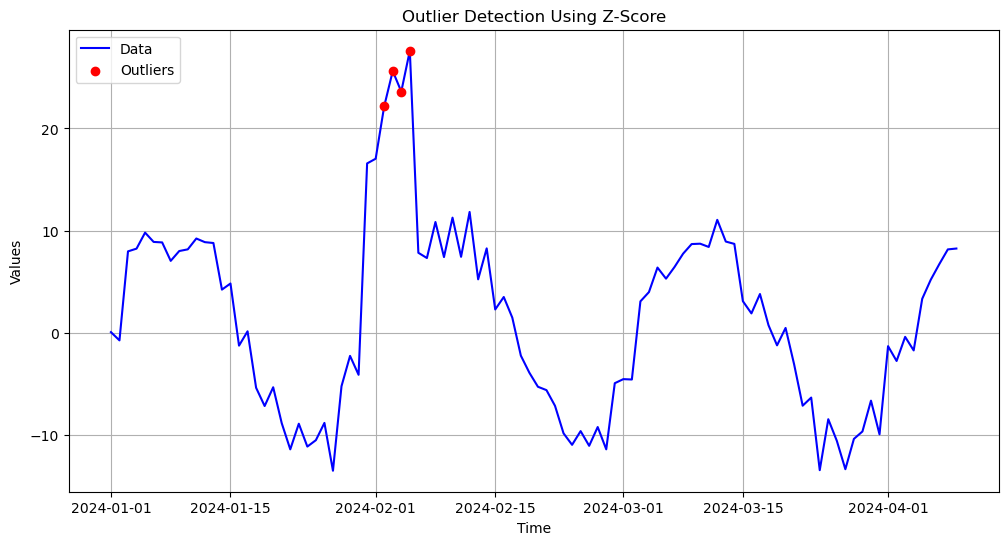

Detected Outliers:
                value   z_score  is_outlier
time                                       
2024-02-02  22.174398  2.292690        True
2024-02-03  25.617249  2.672149        True
2024-02-04  23.611571  2.451090        True
2024-02-05  27.610678  2.891857        True


In [113]:
#3.
data = pd.DataFrame({"time": pd.date_range(start ="2024-01-01", periods =100, freq="D"),
                     "value": np.sin(np.linspace(0, 20, 100)) * 10 + np.random.normal(scale =2, size =100)})

data.loc[30:35, "value"] += 20  

data["time"] = pd.to_datetime(data["time"])
data.set_index("time", inplace =True)

data["z_score"] = (data["value"] - data["value"].mean()) / data["value"].std()
data["is_outlier"] = np.abs(data["z_score"]) > 2 

plt.figure(figsize =(12, 6))
plt.plot(data.index, data["value"], label ="Data", color ="blue")
plt.scatter(data.index[data["is_outlier"]],
            data["value"][data["is_outlier"]],
            color ="red",
            label ="Outliers",
            zorder =5)

plt.title("Outlier Detection Using Z-Score")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend(loc ="upper left")
plt.grid(True)
plt.show()

outliers = data[data["is_outlier"]]

if outliers.empty:
    print("No outliers detected.")
else:
    print("Detected Outliers:")
    print(outliers)
